<a href="https://colab.research.google.com/github/HariDarshan0710/Battery-Store-app/blob/main/Sentimental_Analysis_Of_Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv
User uploaded file "Restaurant_Reviews.tsv" with length 61332 bytes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
len(dataset)

1000

In [4]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 0)

In [85]:
# from sklearn.svm import SVC
# classifier = SVC()
# classifier.fit(X_train,y_train)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       102
           1       0.76      0.66      0.70       108

    accuracy                           0.71       210
   macro avg       0.72      0.72      0.71       210
weighted avg       0.72      0.71      0.71       210



In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 23]
 [37 71]]


In [89]:
print(metrics.accuracy_score(y_test,y_pred))

0.7142857142857143


Text(33.222222222222214, 0.5, 'Actual values')

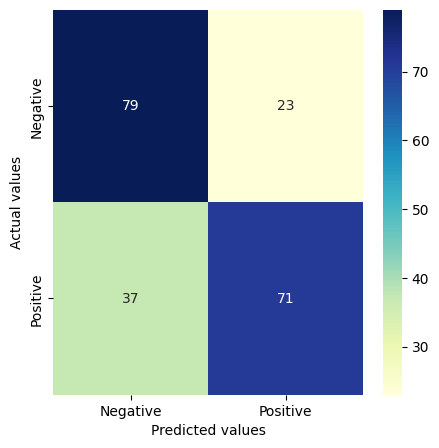

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  # Import accuracy_score
import numpy as np

# Assuming you have already split your data into X_train, X_test, y_train, y_test

best_accuracy = 0.0
alpha_val = 0.0

# Use a different range for alpha (C in SVC) values
for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = SVC(C=i)  # Use C instead of alpha for SVM
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)

    print("Accuracy score for alpha={} is: {}%".format(round(i, 1), round(score * 100, 2)))

    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i

print('----------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy * 100, 2), round(alpha_val)))


Accuracy score for alpha=0.1 is: 50.0%
Accuracy score for alpha=0.2 is: 55.71%
Accuracy score for alpha=0.3 is: 61.9%
Accuracy score for alpha=0.4 is: 66.19%
Accuracy score for alpha=0.5 is: 67.62%
Accuracy score for alpha=0.6 is: 69.52%
Accuracy score for alpha=0.7 is: 70.48%
Accuracy score for alpha=0.8 is: 70.48%
Accuracy score for alpha=0.9 is: 71.9%
Accuracy score for alpha=1.0 is: 73.81%
----------------
The best accuracy is 73.81% with alpha value as 1


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have already split your data into X_train, X_test, y_train, y_test

best_accuracy = 0.0
alpha_val = 0.0

# Use a different range for the regularization parameter C
for C in np.arange(0.1, 1.1, 0.1):
    temp_classifier = LogisticRegression(C=C, random_state=42)  # Adjust C as needed
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)

    print("Accuracy score for alpha={} is: {}%".format(round(C, 1), round(score * 100, 2)))

    if score > best_accuracy:
        best_accuracy = score
        alpha_val = C

print('----------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy * 100, 2), round(alpha_val)))


Accuracy score for alpha=0.1 is: 74.76%
Accuracy score for alpha=0.2 is: 75.71%
Accuracy score for alpha=0.3 is: 74.29%
Accuracy score for alpha=0.4 is: 73.33%
Accuracy score for alpha=0.5 is: 73.33%
Accuracy score for alpha=0.6 is: 73.33%
Accuracy score for alpha=0.7 is: 72.38%
Accuracy score for alpha=0.8 is: 71.9%
Accuracy score for alpha=0.9 is: 71.9%
Accuracy score for alpha=1.0 is: 71.43%
----------------
The best accuracy is 75.71% with alpha value as 0


In [97]:
from nltk.stem.porter import PorterStemmer
def predict_sentiment(sample_reviews):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl='',string=sample_review)
  sample_review_words=sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review=''.join(final_review)

  temp=cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [99]:
def predict_sentiment(review):

 sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE REVIEW.')
else:
    print('This is a NEGATIVE REVIEW.')


This is a NEGATIVE REVIEW.


In [82]:
def predict_sentiment(review):

 sample_review = 'The food was preety worst but service was good.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE REVIEW.')
else:
    print('This is a NEGATIVE REVIEW.')

This is a NEGATIVE REVIEW.


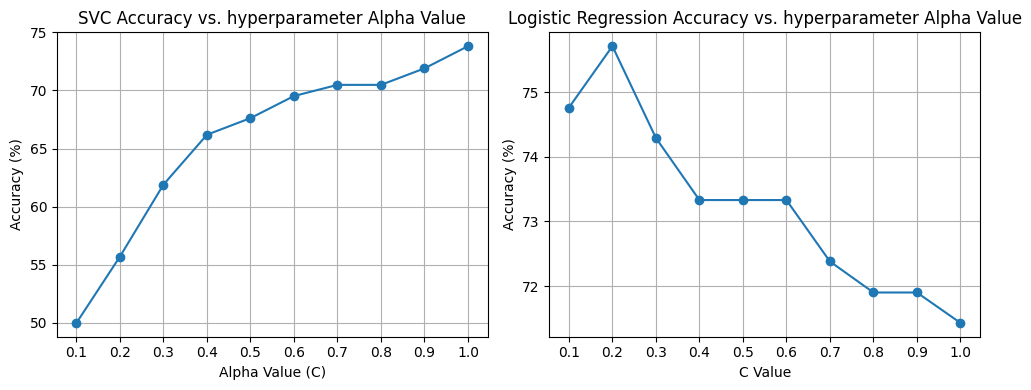

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for SVC with different alpha (C) values
svc_alpha_values = np.arange(0.1, 1.1, 0.1)
svc_accuracy_scores = [50.0, 55.71, 61.9, 66.19, 67.62, 69.52, 70.48, 70.48, 71.9, 73.81]

# Accuracy scores for Logistic Regression with different C values
logistic_C_values = np.arange(0.1, 1.1, 0.1)
logistic_accuracy_scores = [74.76, 75.71, 74.29, 73.33, 73.33, 73.33, 72.38, 71.9, 71.9, 71.43]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot SVC accuracy scores
axes[0].plot(svc_alpha_values, svc_accuracy_scores, marker='o', linestyle='-')
axes[0].set_title('SVC Accuracy vs. hyperparameter Alpha Value')
axes[0].set_xlabel('Alpha Value (C)')
axes[0].set_ylabel('Accuracy (%)')
axes[0].grid(True)
axes[0].set_xticks(svc_alpha_values)

# Plot Logistic Regression accuracy scores
axes[1].plot(logistic_C_values, logistic_accuracy_scores, marker='o', linestyle='-')
axes[1].set_title('Logistic Regression Accuracy vs. hyperparameter Alpha Value')
axes[1].set_xlabel('C Value')
axes[1].set_ylabel('Accuracy (%)')
axes[1].grid(True)
axes[1].set_xticks(logistic_C_values)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
